In [17]:
import os
import shutil
import itertools
import pathlib
from PIL import Image
#import Data handling
import numpy as np
import scipy as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
#import Deep learning tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , BatchNormalization , Dropout,Flatten , Activation,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [18]:
train = pathlib.Path(r'C:\Users\krunal sheth\Downloads\Cotton Disease\train_aug')
test = pathlib.Path(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test')
val = pathlib.Path(r'C:\Users\krunal sheth\Downloads\Cotton Disease\val_aug')

print('train',train)
print('test',test)
print('val',val)

train C:\Users\krunal sheth\Downloads\Cotton Disease\train_aug
test C:\Users\krunal sheth\Downloads\Cotton Disease\test
val C:\Users\krunal sheth\Downloads\Cotton Disease\val_aug


In [19]:
print('Training_count',len(list(train.glob('*/*.jpg'))))
print('Testing_count',len(list(test.glob('*/*.jpg'))))
print('Validation_count',len(list(val.glob('*/*.jpg'))))

Training_count 9755
Testing_count 106
Validation_count 1265


In [20]:
train_datagen = ImageDataGenerator(rescale= 1./255,rotation_range=20,height_shift_range=0.2,                               
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True                           
    )                             
val_datagen = ImageDataGenerator(rescale = 1./255)                                
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(train, target_size=(64,64),batch_size=32, class_mode='categorical')

Found 9755 images belonging to 4 classes.


In [22]:
val_set = val_datagen.flow_from_directory(val, target_size=(64,64),batch_size=32, class_mode='categorical')

Found 1265 images belonging to 4 classes.


In [23]:
testing_set = test_datagen.flow_from_directory(test, target_size=(64,64),batch_size=32, class_mode='categorical')

Found 106 images belonging to 4 classes.


In [24]:
model = tf.keras.Sequential()
model.add(Conv2D(32,(3,3), input_shape = (64,64,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,268 (1.17 MB)

 Trainable params: 307,268 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

history = model.fit(training_set, validation_data = val_set, epochs = 20, verbose = 1 , callbacks = [early_stop,reduce_lr])

Epoch 1/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 187s 596ms/step - accuracy: 0.4663 - loss: 1.1959 - val_accuracy: 0.5605 - val_loss: 0.9430 - learning_rate: 0.0010
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 179s 588ms/step - accuracy: 0.6658 - loss: 0.8095 - val_accuracy: 0.7320 - val_loss: 0.6134 - learning_rate: 0.0010
Epoch 3/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 178s 585ms/step - accuracy: 0.7773 - loss: 0.5600 - val_accuracy: 0.8957 - val_loss: 0.2893 - learning_rate: 0.0010
Epoch 4/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 188s 616ms/step - accuracy: 0.8387 - loss: 0.4029 - val_accuracy: 0.8735 - val_loss: 0.3076 - learning_rate: 0.0010
Epoch 5/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 180s 591ms/step - accuracy: 0.8636 - loss: 0.3478 - val_accuracy: 0.9051 - val_loss: 0.2428 - learning_rate: 0.0010
Epoch 6/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 184s 601ms/step - accuracy: 0.8654 - loss: 0.3282 - val_accuracy: 0.9170 - val_loss: 0.2401 - learning_rate: 0.0010
Epoch 7/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 179s 587ms/step - accura

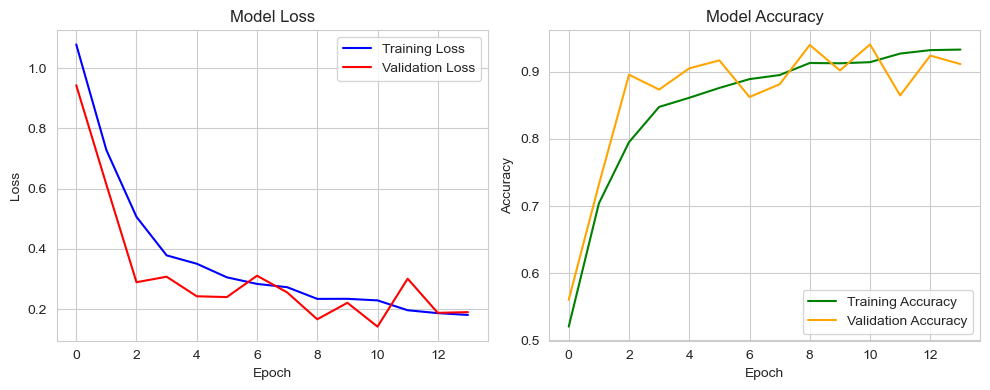

In [29]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
from tensorflow.keras.models import load_model
model.save('cotton_disease_CNN.h5')

In [31]:
model = load_model('cotton_disease_CNN.h5')

In [32]:
# Get model predictions
pred_probs = model.predict(testing_set)
predicted_classes = np.argmax(pred_probs, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [33]:
true_classes = testing_set.classes  # True class indices
class_labels = list(testing_set.class_indices.keys())  # Class names

                       precision    recall  f1-score   support

 diseased cotton leaf       0.17      0.16      0.16        25
diseased cotton plant       0.24      0.25      0.25        28
    fresh cotton leaf       0.15      0.15      0.15        26
   fresh cotton plant       0.22      0.22      0.22        27

             accuracy                           0.20       106
            macro avg       0.20      0.20      0.20       106
         weighted avg       0.20      0.20      0.20       106



Text(0.5, 1.0, 'Confusion Matrix')

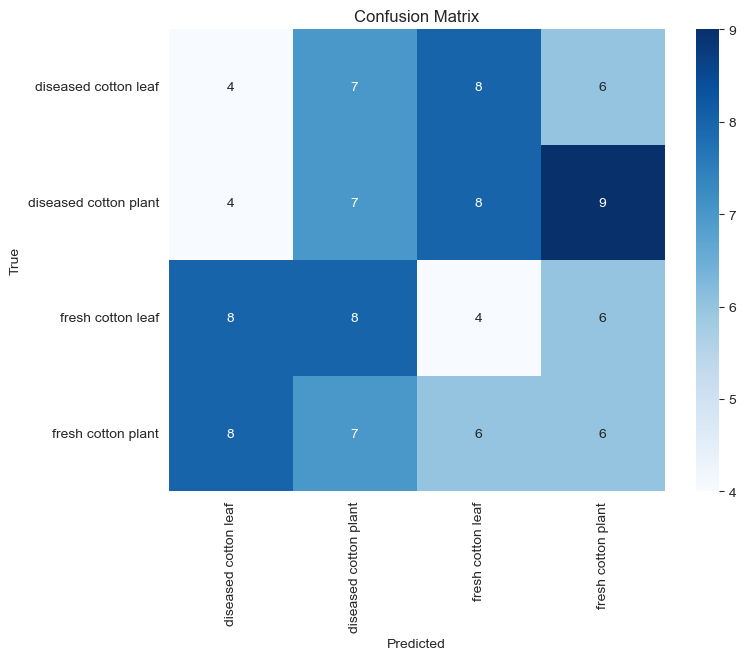

In [34]:
# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [18]:
print(training_set.class_indices)
print(testing_set.class_indices)


{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [35]:
model.evaluate(testing_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9718 - loss: 0.1018


[0.12585139274597168, 0.9528301954269409]

In [38]:
model.evaluate(val_set)

40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 403ms/step - accuracy: 0.9469 - loss: 0.1382


[0.1420944333076477, 0.9407114386558533]

In [45]:
from tensorflow.keras.preprocessing import image
class_names = ['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']
def predict_image(imagepath, classifier):
    predict = image.load_img(imagepath, target_size = (64, 64),color_mode='rgb')
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)

    # Get class index and name
    predicted_class_index = np.argmax(result, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]

    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted calss name: {predicted_class_name}")

    return predicted_class_index, predicted_class_name

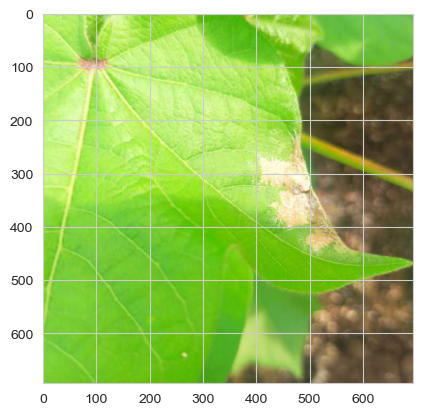

In [46]:
test_img = image.load_img(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test\diseased cotton leaf\dis_leaf (260)_iaip.jpg')
plt.imshow(test_img)

In [47]:
predict_image(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test\diseased cotton leaf\dis_leaf (260)_iaip.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted class index: 0
Predicted calss name: diseased cotton leaf


(0, 'diseased cotton leaf')

In [49]:
predict_image(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test\diseased cotton leaf\dis_leaf (341)_iaip.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class index: 0
Predicted calss name: diseased cotton leaf


(0, 'diseased cotton leaf')

In [50]:
predict_image(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test\diseased cotton plant\dd (862)_iaip.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted class index: 1
Predicted calss name: diseased cotton plant


(1, 'diseased cotton plant')

In [51]:
predict_image(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test\diseased cotton plant\dd (188)_iaip.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted class index: 1
Predicted calss name: diseased cotton plant


(1, 'diseased cotton plant')

In [52]:
predict_image(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test\fresh cotton leaf\d (378).jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted class index: 2
Predicted calss name: fresh cotton leaf


(2, 'fresh cotton leaf')

In [53]:
predict_image(r'C:\Users\krunal sheth\Downloads\Cotton Disease\test\fresh cotton plant\dsd (160)_iaip.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted class index: 3
Predicted calss name: fresh cotton plant


(3, 'fresh cotton plant')